In [30]:
import numpy as np # linear algebra
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.metrics import f1_score

In [2]:
train=pd.read_csv("train_Df64byy.csv")
test=pd.read_csv("test_YCcRUnU.csv")
s=pd.read_csv("sample_submission_QrCyCoT.csv")

In [3]:
train.shape

(50882, 14)

In [4]:
df=train.append(test,ignore_index=True) # merge train and test data to apply same operation in test as in train data
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0


In [5]:
df.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                   21805
dtype: int64

In [6]:
for col in df.columns:
    print(col,"->",df[col].nunique())

ID -> 72687
City_Code -> 36
Region_Code -> 5538
Accomodation_Type -> 2
Reco_Insurance_Type -> 2
Upper_Age -> 58
Lower_Age -> 60
Is_Spouse -> 2
Health Indicator -> 9
Holding_Policy_Duration -> 15
Holding_Policy_Type -> 4
Reco_Policy_Cat -> 22
Reco_Policy_Premium -> 7685
Response -> 2


In [7]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [8]:
df['Health_Indicator_null'] = df['Health Indicator'].apply(lambda x: 1 if x!=x else 0)
df['Holding_Policy_Duration_null'] = df['Holding_Policy_Duration'].apply(lambda x: 1 if x!=x else 0)
df['Health Indicator']=df['Health Indicator'].fillna('X10')
df['age_dist']=(df['Upper_Age']-df['Lower_Age'])/df['Lower_Age']
df['age']=(df['Upper_Age']-df['Lower_Age'])

In [9]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Health_Indicator_null,Holding_Policy_Duration_null,age_dist,age
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0,0,0,0.000000,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0.0,0,1,2.409091,53
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,1.0,19,7450.0,1.0,1,0,0.000000,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0,0,0,0.083333,4
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0,0,0,0.000000,0


In [10]:
df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna('5.0')
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].fillna('5.0')
dum=['Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Holding_Policy_Type']

In [11]:
df.isnull().sum()

ID                                  0
City_Code                           0
Region_Code                         0
Accomodation_Type                   0
Reco_Insurance_Type                 0
Upper_Age                           0
Lower_Age                           0
Is_Spouse                           0
Health Indicator                    0
Holding_Policy_Duration             0
Holding_Policy_Type                 0
Reco_Policy_Cat                     0
Reco_Policy_Premium                 0
Response                        21805
Health_Indicator_null               0
Holding_Policy_Duration_null        0
age_dist                            0
age                                 0
dtype: int64

In [12]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,Health_Indicator_null,Holding_Policy_Duration_null,age_dist,age
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3,22,11628.0,0.0,0,0,0.000000,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,5.0,5.0,22,30510.0,0.0,0,1,2.409091,53
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,1,19,7450.0,1.0,1,0,0.000000,0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3,19,17780.0,0.0,0,0,0.083333,4
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1,16,10404.0,0.0,0,0,0.000000,0


In [13]:
df.shape

(72687, 18)

In [14]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Upper_Age':['mean','max'],
    'Lower_Age':['mean','min'],
    'Health Indicator':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    
}

df1 = df.groupby(['Reco_Policy_Cat']).agg(agg_data)

df1.columns=['A_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on='Reco_Policy_Cat',how='left')

In [15]:
df.shape

(72687, 38)

In [16]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Upper_Age':['mean','max'],
    'Lower_Age':['mean','min'],
    'Health Indicator':['size','nunique'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    
}

df1 = df.groupby(['Region_Code','Reco_Policy_Cat']).agg(agg_data)

df1.columns=['B_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Region_Code','Reco_Policy_Cat'],how='left')

In [17]:
df.shape

(72687, 56)

In [18]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Health Indicator':['size','nunique'],
    'Upper_Age':['mean','max'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Lower_Age':['mean','min'],
}

df1 = df.groupby(['Region_Code','Reco_Insurance_Type']).agg(agg_data)

df1.columns=['C_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Region_Code','Reco_Insurance_Type'],how='left')

In [20]:
df.shape

(72687, 76)

In [21]:
agg_data={
    'Reco_Policy_Premium':['sum','max','min','mean'],
    'age_dist':['sum','max','min','mean'],
    'Lower_Age':['mean','min'],
    'Health Indicator':['size','nunique'],
    'Holding_Policy_Duration':['size','nunique'],
    'City_Code':['size','nunique'],
    'Region_Code':['size','nunique'],
    'Reco_Insurance_Type':['size','nunique'],
    
}

df1 = df.groupby(['Reco_Policy_Cat','Reco_Insurance_Type','Upper_Age']).agg(agg_data)

df1.columns=['D_' + '_'.join(col).strip() for col in df1.columns.values]
df1.reset_index(inplace=True)
df1.head()
df=df.merge(df1,on=['Reco_Policy_Cat','Reco_Insurance_Type','Upper_Age'],how='left')

In [22]:
df.shape

(72687, 96)

In [23]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,...,D_Health Indicator_size,D_Health Indicator_nunique,D_Holding_Policy_Duration_size,D_Holding_Policy_Duration_nunique,D_City_Code_size,D_City_Code_nunique,D_Region_Code_size,D_Region_Code_nunique,D_Reco_Insurance_Type_size,D_Reco_Insurance_Type_nunique
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,...,109,7,109,14,109,26,109,104,109,1
1,2,C5,1117,Owned,Joint,75,22,No,X2,5.0,...,151,7,151,15,151,19,151,140,151,1
2,3,C5,3732,Owned,Individual,32,32,No,X10,1.0,...,73,7,73,11,73,19,73,69,73,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,...,33,7,33,10,33,12,33,31,33,1
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,...,69,9,69,13,69,15,69,65,69,1


In [24]:
df['F2'] = (df['Health Indicator'].astype(str)+' '+df['Holding_Policy_Type'].astype(str)).astype('category')
df['F3'] = (df['Health Indicator'].astype(str)+' '+df['Reco_Policy_Cat'].astype(str)).astype('category')
df['F4'] = (df['Health Indicator'].astype(str)+' '+df['Region_Code'].astype(str)).astype('category')

df['F5'] = (df['Holding_Policy_Duration'].astype(str)+' '+df['Holding_Policy_Type'].astype(str)).astype('category')
df['F6'] = (df['Holding_Policy_Duration'].astype(str)+' '+df['Reco_Policy_Cat'].astype(str)).astype('category')
df['F7'] = (df['Holding_Policy_Duration'].astype(str)+' '+df['Region_Code'].astype(str)).astype('category')


df['F8'] = (df['Holding_Policy_Type'].astype(str)+' '+df['Reco_Policy_Cat'].astype(str)).astype('category')
df['F9'] = (df['Holding_Policy_Type'].astype(str)+' '+df['Region_Code'].astype(str)).astype('category')


df['F10'] = (df['Region_Code'].astype(str)+' '+df['Reco_Policy_Cat'].astype(str)).astype('category')




df=pd.get_dummies(df,columns=dum,drop_first=True)
cat=['City_Code','Region_Code','Health Indicator','Holding_Policy_Duration'
     ,'Reco_Policy_Cat'
    ]
for k in cat:
    df[k]=df[k].astype('category')

In [25]:
to_drop=[]
corr_matrix = df.drop(['ID','Response'],axis=1).corr()
# print(corr_matrix)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper   

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)


df.drop(to_drop,inplace=True,axis=1)

['age', 'A_age_dist_sum', 'A_Lower_Age_mean', 'A_Health Indicator_size', 'A_Region_Code_size', 'A_Region_Code_nunique', 'A_Holding_Policy_Duration_size', 'A_City_Code_size', 'B_Health Indicator_size', 'B_Holding_Policy_Duration_size', 'B_City_Code_size', 'C_Holding_Policy_Duration_size', 'C_City_Code_size', 'C_Region_Code_size', 'D_Reco_Policy_Premium_min', 'D_Reco_Policy_Premium_mean', 'D_Lower_Age_mean', 'D_Holding_Policy_Duration_size', 'D_City_Code_size', 'D_Region_Code_size', 'D_Region_Code_nunique', 'D_Reco_Insurance_Type_size', 'Holding_Policy_Type_5.0']


In [26]:
dftrain=df[df['Response'].isnull()!=True]
dftest=df[df['Response'].isnull()==True]
dftest.head()

,ID,City_Code,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,...,F7,F8,F9,F10,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0
50882,50883,C1,156,30,30,X10,6.0,5,11934.0,NaN,...,6.0 156,3.0 5,3.0 156,156 5,0,0,0,0,1,0
50883,50884,C4,7,69,68,X1,3.0,18,32204.8,NaN,...,3.0 7,3.0 18,3.0 7,7 18,0,1,1,0,1,0
50884,50885,C1,564,28,28,X3,2.0,17,9240.0,NaN,...,2.0 564,4.0 17,4.0 564,564 17,1,0,0,0,0,1
50885,50886,C3,1177,23,23,X3,3.0,18,9086.0,NaN,...,3.0 1177,3.0 18,3.0 1177,1177 18,1,0,0,0,1,0
50886,50887,C1,951,75,75,X3,5.0,5,22534.0,NaN,...,5.0 951,5.0 5,5.0 951,951 5,0,0,0,0,0,0


In [28]:
X,y=dftrain.drop(['ID','Response'],axis=1),dftrain['Response']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994,stratify=y)

In [31]:
m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4
                )
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)],eval_metric='AUC', early_stopping_rounds=200,verbose=200)
p=m.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.907253	training's binary_logloss: 0.338126	valid_1's auc: 0.786774	valid_1's binary_logloss: 0.456224
Early stopping, best iteration is:
[57]	training's auc: 0.851088	training's binary_logloss: 0.406952	valid_1's auc: 0.791244	valid_1's binary_logloss: 0.448667
0.7912442475018797


In [32]:
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices
m2=CatBoostClassifier(n_estimators=3000,random_state=1994,
                         eval_metric='AUC',learning_rate=0.05,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,
#                       class_weights={0:0.239947,1:0.760053},
#                       min_data_in_leaf=5,
#                       auto_class_weights='Balanced',
                      one_hot_max_size=10,
#                      task_type='GPU')
                     )
m2.fit(X_train,y_train,eval_set=[(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
p=m2.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p))

0:	test: 0.5285542	best: 0.5285542 (0)	total: 268ms	remaining: 13m 24s
200:	test: 0.7819159	best: 0.7819175 (199)	total: 18.7s	remaining: 4m 20s
400:	test: 0.7959787	best: 0.7959787 (400)	total: 38.7s	remaining: 4m 10s
600:	test: 0.7983167	best: 0.7983167 (600)	total: 1m	remaining: 4m 1s
800:	test: 0.7993733	best: 0.7994045 (795)	total: 1m 22s	remaining: 3m 46s
1000:	test: 0.7995960	best: 0.7998098 (961)	total: 1m 45s	remaining: 3m 29s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7998098123
bestIteration = 961

Shrink model to first 962 iterations.
0.7998098122561911


In [33]:
categorical_features_indices = np.where(X_train.dtypes =='category')[0]
categorical_features_indices
m3=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=10)
m3.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
p3=m3.predict_proba(X_val)[:,-1]
print(roc_auc_score(y_val,p3))

0:	test: 0.5282594	test1: 0.5285542	best: 0.5285542 (0)	total: 157ms	remaining: 7m 51s
200:	test: 0.9045155	test1: 0.7819159	best: 0.7819175 (199)	total: 21s	remaining: 4m 53s
400:	test: 0.9076440	test1: 0.7959787	best: 0.7959787 (400)	total: 44.9s	remaining: 4m 51s
600:	test: 0.9132826	test1: 0.7983167	best: 0.7983167 (600)	total: 1m 9s	remaining: 4m 38s
800:	test: 0.9159147	test1: 0.7993733	best: 0.7994045 (795)	total: 1m 34s	remaining: 4m 19s
1000:	test: 0.9174589	test1: 0.7995960	best: 0.7998098 (961)	total: 1m 59s	remaining: 3m 58s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.7998098123
bestIteration = 961

Shrink model to first 962 iterations.
0.7998098122561911


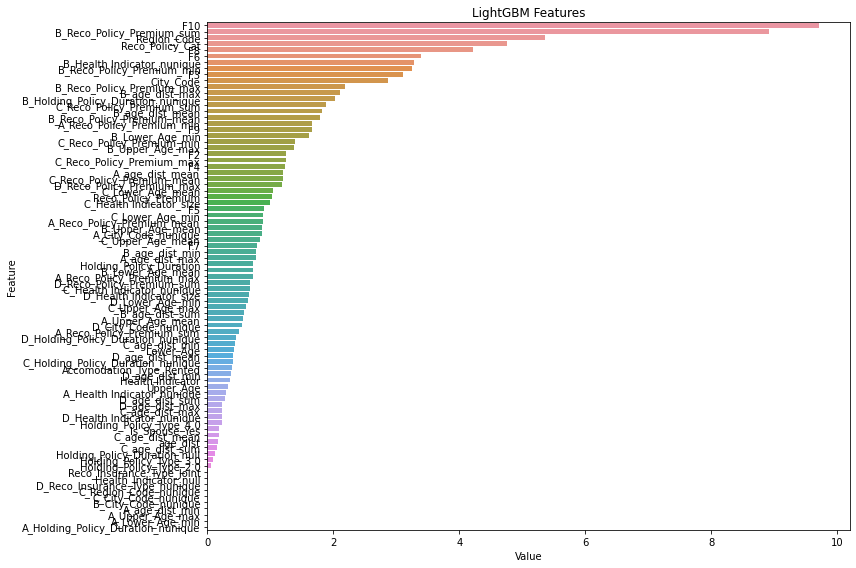

In [34]:
feature_imp = pd.DataFrame(sorted(zip(m2.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [35]:
feat_cols = feature_imp['Feature'][:55].values
feat_cols

array(['F10', 'B_Reco_Policy_Premium_sum', 'Region_Code',
       'Reco_Policy_Cat', 'F8', 'F6', 'B_Health Indicator_nunique',
       'B_Reco_Policy_Premium_min', 'F3', 'City_Code',
       'B_Reco_Policy_Premium_max', 'B_age_dist_max',
       'B_Holding_Policy_Duration_nunique', 'C_Reco_Policy_Premium_sum',
       'B_age_dist_mean', 'B_Reco_Policy_Premium_mean',
       'A_Reco_Policy_Premium_min', 'F9', 'B_Lower_Age_min',
       'C_Reco_Policy_Premium_min', 'B_Upper_Age_max', 'F2',
       'C_Reco_Policy_Premium_max', 'F4', 'A_age_dist_mean',
       'C_Reco_Policy_Premium_mean', 'D_Reco_Policy_Premium_max',
       'C_Lower_Age_mean', 'Reco_Policy_Premium',
       'C_Health Indicator_size', 'F5', 'C_Lower_Age_min',
       'A_Reco_Policy_Premium_mean', 'B_Upper_Age_mean',
       'A_City_Code_nunique', 'C_Upper_Age_mean', 'F7', 'B_age_dist_min',
       'A_age_dist_max', 'Holding_Policy_Duration', 'B_Lower_Age_mean',
       'A_Reco_Policy_Premium_max', 'D_Reco_Policy_Premium_sum',
       'C_

In [36]:
Xtest=dftest.drop(['ID','Response'],axis=1)
Xtest[feat_cols]

,F10,B_Reco_Policy_Premium_sum,Region_Code,Reco_Policy_Cat,F8,F6,B_Health Indicator_nunique,B_Reco_Policy_Premium_min,F3,City_Code,...,D_Lower_Age_min,C_Upper_Age_max,B_age_dist_sum,A_Upper_Age_mean,D_City_Code_nunique,A_Reco_Policy_Premium_sum,D_Holding_Policy_Duration_nunique,C_age_dist_min,Lower_Age,D_age_dist_mean
50882,156 5,459151.0,156,5,3.0 5,6.0 5,8,5448.0,X10 5,C1,...,30,75,2.823135,49.834825,9,23367931.8,7,0.000000,30,0.000000
50883,7 18,697025.0,7,18,3.0 18,3.0 18,7,4110.0,X1 18,C4,...,22,69,1.752458,46.389480,10,115685000.6,9,0.014706,68,0.223748
50884,564 17,28348.0,564,17,4.0 17,2.0 17,2,9240.0,X3 17,C1,...,28,75,0.000000,46.530579,26,81086433.8,8,0.000000,28,0.000000
50885,1177 18,210721.6,1177,18,3.0 18,3.0 18,7,3870.0,X3 18,C3,...,23,74,1.511445,46.389480,27,115685000.6,4,0.000000,23,0.000000
50886,951 5,289398.4,951,5,5.0 5,5.0 5,5,6660.0,X3 5,C1,...,75,75,4.002339,49.834825,12,23367931.8,14,0.000000,75,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,1044 18,211024.0,1044,18,1.0 18,4.0 18,6,5448.0,X1 18,C3,...,45,65,0.952381,46.389480,19,115685000.6,15,0.000000,45,0.000000
72683,266 18,386219.8,266,18,3.0 18,6.0 18,6,5960.0,X5 18,C4,...,59,75,0.294750,46.389480,17,115685000.6,14,0.000000,59,0.000000
72684,2470 1,87476.0,2470,1,5.0 1,5.0 1,4,10206.0,X3 1,C12,...,74,74,0.082875,44.048649,11,35731780.2,7,0.000000,74,0.000000
72685,1676 19,19776.0,1676,19,1.0 19,3.0 19,2,8208.0,X4 19,C10,...,25,59,0.000000,45.305697,22,78266834.2,5,0.000000,25,0.000000


In [37]:
categorical_features_indices = np.where(X[feat_cols].dtypes =='category')[0]
categorical_features_indices

array([ 0,  2,  3,  4,  5,  8,  9, 17, 21, 23, 30, 36, 39], dtype=int64)

In [39]:
err=[]
y_pred_tot=[]


fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols],y):
    X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=3000,random_state=1994,
                         eval_metric='AUC',learning_rate=0.05,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,
#                       class_weights={0:0.239947,1:0.760053},
#                       min_data_in_leaf=5,
#                       auto_class_weights='Balanced',
                         one_hot_max_size=10,
#                      task_type='GPU')
                        )
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[feat_cols],ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot.append(p)

0:	test: 0.5921326	best: 0.5921326 (0)	total: 107ms	remaining: 5m 21s
200:	test: 0.7917682	best: 0.7917682 (200)	total: 19.1s	remaining: 4m 25s
400:	test: 0.8030455	best: 0.8030455 (400)	total: 41s	remaining: 4m 25s
600:	test: 0.8068592	best: 0.8069551 (593)	total: 1m 5s	remaining: 4m 19s
800:	test: 0.8085058	best: 0.8085058 (800)	total: 1m 28s	remaining: 4m 1s
1000:	test: 0.8089719	best: 0.8090248 (978)	total: 1m 50s	remaining: 3m 40s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8090307333
bestIteration = 1004

Shrink model to first 1005 iterations.
err:  0.8090284041680113
0:	test: 0.5819705	best: 0.5819705 (0)	total: 109ms	remaining: 5m 27s
200:	test: 0.7935735	best: 0.7935735 (200)	total: 19.7s	remaining: 4m 34s
400:	test: 0.8083964	best: 0.8084817 (398)	total: 41s	remaining: 4m 25s
600:	test: 0.8114556	best: 0.8115853 (546)	total: 1m 4s	remaining: 4m 15s
800:	test: 0.8129125	best: 0.8129494 (791)	total: 1m 27s	remaining: 3m 59s
Stopped by overfitting detect

In [41]:
err2 = []
y_pred_tot2=[]


fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols],y):
    X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=3000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=4,one_hot_max_size=10)
    m.fit(X_train,y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=100,verbose=200,cat_features=categorical_features_indices)
    
    preds=m.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("roc score: ",roc_auc_score(y_test,preds))
    err2.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[feat_cols],ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot2.append(p)

0:	test: 0.5921326	best: 0.5921326 (0)	total: 109ms	remaining: 5m 28s
200:	test: 0.7917682	best: 0.7917682 (200)	total: 18.5s	remaining: 4m 17s
400:	test: 0.8030455	best: 0.8030455 (400)	total: 40.6s	remaining: 4m 23s
600:	test: 0.8068592	best: 0.8069551 (593)	total: 1m 4s	remaining: 4m 18s
800:	test: 0.8085058	best: 0.8085058 (800)	total: 1m 29s	remaining: 4m 5s
1000:	test: 0.8089719	best: 0.8090248 (978)	total: 1m 53s	remaining: 3m 47s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8090307333
bestIteration = 1004

Shrink model to first 1005 iterations.
roc score:  0.8090284041680113
0:	test: 0.5819705	best: 0.5819705 (0)	total: 121ms	remaining: 6m 4s
200:	test: 0.7935735	best: 0.7935735 (200)	total: 21.7s	remaining: 5m 2s
400:	test: 0.8083964	best: 0.8084817 (398)	total: 44.3s	remaining: 4m 47s
600:	test: 0.8114556	best: 0.8115853 (546)	total: 1m 7s	remaining: 4m 28s
800:	test: 0.8129125	best: 0.8129494 (791)	total: 1m 30s	remaining: 4m 7s
Stopped by overfitting

In [43]:

err1=[]
y_pred_tot1=[]


fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols],y):
    X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=LGBMClassifier(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.5,reg_alpha=4)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],eval_metric='AUC', early_stopping_rounds=50,verbose=200)
    
    preds=m.predict_proba(X_test,num_iteration=m.best_iteration_)[:,-1]
    print("roc score: ",roc_auc_score(y_test,preds))
    err1.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(Xtest[feat_cols],num_iteration=m.best_iteration_)[:,-1]
    y_pred_tot1.append(p)

C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	training's auc: 0.847226	training's binary_logloss: 0.410668	valid_1's auc: 0.794084	valid_1's binary_logloss: 0.446994
roc score:  0.7940840742029986


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[56]	training's auc: 0.848867	training's binary_logloss: 0.408823	valid_1's auc: 0.803371	valid_1's binary_logloss: 0.440283
roc score:  0.803370671131788


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	training's auc: 0.84453	training's binary_logloss: 0.414243	valid_1's auc: 0.796286	valid_1's binary_logloss: 0.445609
roc score:  0.7962864699001475


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[57]	training's auc: 0.849557	training's binary_logloss: 0.407849	valid_1's auc: 0.789811	valid_1's binary_logloss: 0.449343
roc score:  0.789811286708106


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	training's auc: 0.837361	training's binary_logloss: 0.425212	valid_1's auc: 0.790482	valid_1's binary_logloss: 0.453309
roc score:  0.7904817152295818


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[62]	training's auc: 0.852486	training's binary_logloss: 0.403924	valid_1's auc: 0.804762	valid_1's binary_logloss: 0.438796
roc score:  0.8047615991758739


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[80]	training's auc: 0.865634	training's binary_logloss: 0.388901	valid_1's auc: 0.787137	valid_1's binary_logloss: 0.451153
roc score:  0.7871367735603578


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[54]	training's auc: 0.847339	training's binary_logloss: 0.410628	valid_1's auc: 0.795485	valid_1's binary_logloss: 0.445732
roc score:  0.7954853082859289


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[65]	training's auc: 0.853765	training's binary_logloss: 0.402408	valid_1's auc: 0.80274	valid_1's binary_logloss: 0.439957
roc score:  0.8027403593734083


C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\VisionRI-IT\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[40]	training's auc: 0.836388	training's binary_logloss: 0.426184	valid_1's auc: 0.803314	valid_1's binary_logloss: 0.44537
roc score:  0.8033141047105361


In [44]:
np.mean(err),np.mean(err1),np.mean(err2)

(0.8099378273311941, 0.7967472362278727, 0.8099378273311941)

In [45]:
dftest['Response']=np.mean(y_pred_tot2,0)

dftest[['ID','Response']].to_csv('AV-job-cb-sub9.csv',index=False)

<ipython-input-45-8955e8e6f797>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['Response']=np.mean(y_pred_tot2,0)


In [46]:
dftest['Response']=np.mean(y_pred_tot1,0)

dftest[['ID','Response']].to_csv('AV-job-lgb-sub9.csv',index=False)

<ipython-input-46-7c77ddec488f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['Response']=np.mean(y_pred_tot1,0)


In [47]:
dftest['Response']=np.mean(y_pred_tot,0)*0.1+np.mean(y_pred_tot1,0)*0.05+np.mean(y_pred_tot2,0)*0.85

dftest[['ID','Response']].to_csv('AV-job-stack-sub9.csv',index=False)

<ipython-input-47-1994ea1692ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['Response']=np.mean(y_pred_tot,0)*0.1+np.mean(y_pred_tot1,0)*0.05+np.mean(y_pred_tot2,0)*0.85
